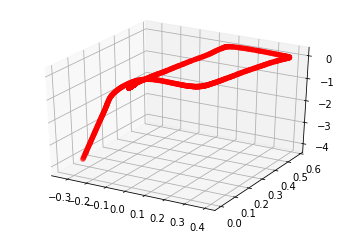

In [3]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
f=open('Rectangle/Accelerometer.csv','r')
readfile=csv.reader(f)
T=list(map(list, zip(*readfile)))
time=[float(i) for i in T[0]]
aX=[float(i) for i in T[1]]
aY=[float(i) for i in T[2]]
aZ=[float(i) for i in T[3]]
f=open('Rectangle/Gyroscope.csv','r')
readfile=csv.reader(f)
T=list(map(list, zip(*readfile)))
wX=[float(i) for i in T[1]]
wY=[float(i) for i in T[2]]
wZ=[float(i) for i in T[3]]

X=[0]
Y=[0]
Z=[0]
R=np.eye(3)
vx=0
vy=0
vz=0
for i in range(len(time)-2):
    dt=(time[i+2]-time[i+1])*10**(-9)
    tx=dt*wX[i+1]
    ty=dt*wY[i+1]
    tz=dt*wZ[i+1]
    Rx=np.array([[1,0,0],
                [0,np.cos(tx),-np.sin(tx)],
                [0,np.sin(tx),np.cos(tx)]])
    
    Ry=np.array([[np.cos(ty),0,np.sin(ty)],
                [0,1,0],
                [-np.sin(ty),0,np.cos(ty)]])
    
    Rz=np.array([[np.cos(tz),-np.sin(tz),0],
                [np.sin(tz),np.cos(tz),0],
                [0,0,1]]) 
    R=np.matmul(Rz,R)
    R=np.matmul(Ry,R)
    R=np.matmul(Rx,R)
    R_temp=np.linalg.inv(R)
    dtt=(time[i+1]-time[i])*10**(-9)
    
    dv=np.array([[dtt*aX[i]],
                 [dtt*aY[i]],
                 [dtt*(aZ[i]-aZ[0])]])
    dv_world=np.matmul(R_temp,dv)
    
    vx+=dv_world[0][0]
    vy+=dv_world[1][0]
    vz+=dv_world[2][0]
    X.append(X[-1]+vx*dt)
    Y.append(Y[-1]+vy*dt)
    Z.append(Z[-1]+vz*dt)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X,Y,Z, c='r', marker='o')


plt.show()
    